In [1]:
pip install torch diffusers transformers pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install accelerate

Note: you may need to restart the kernel to use updated packages.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

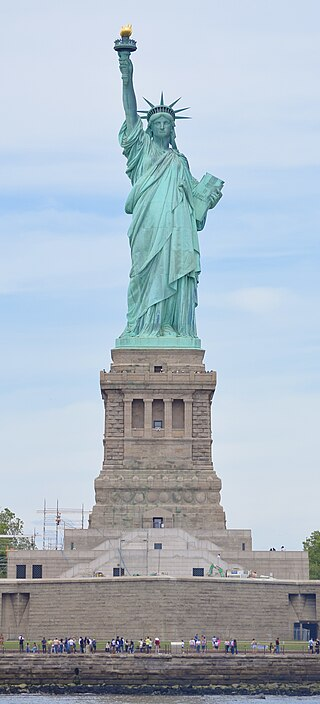

In [17]:
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers.utils import load_image
import PIL

model_id = "timbrooks/instruct-pix2pix"
pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
original_img = load_image("https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Front_view_of_Statue_of_Liberty_with_pedestal_and_base_2024.jpg/320px-Front_view_of_Statue_of_Liberty_with_pedestal_and_base_2024.jpg")
original_img

  0%|          | 0/100 [00:00<?, ?it/s]

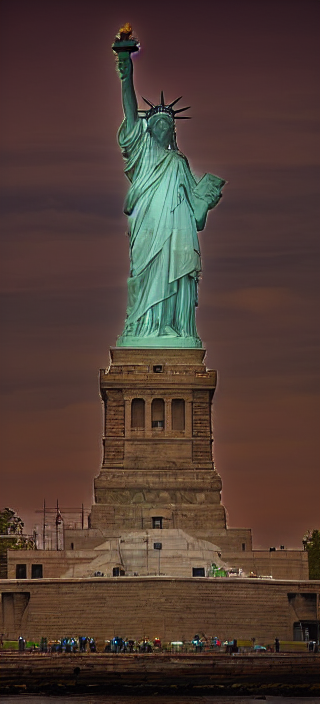

In [18]:
edit_instruct = "Turn the image to have a nightly feel"
edited_img = pipeline(edit_instruct, image=original_img).images[0]
edited_img

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated 4 images


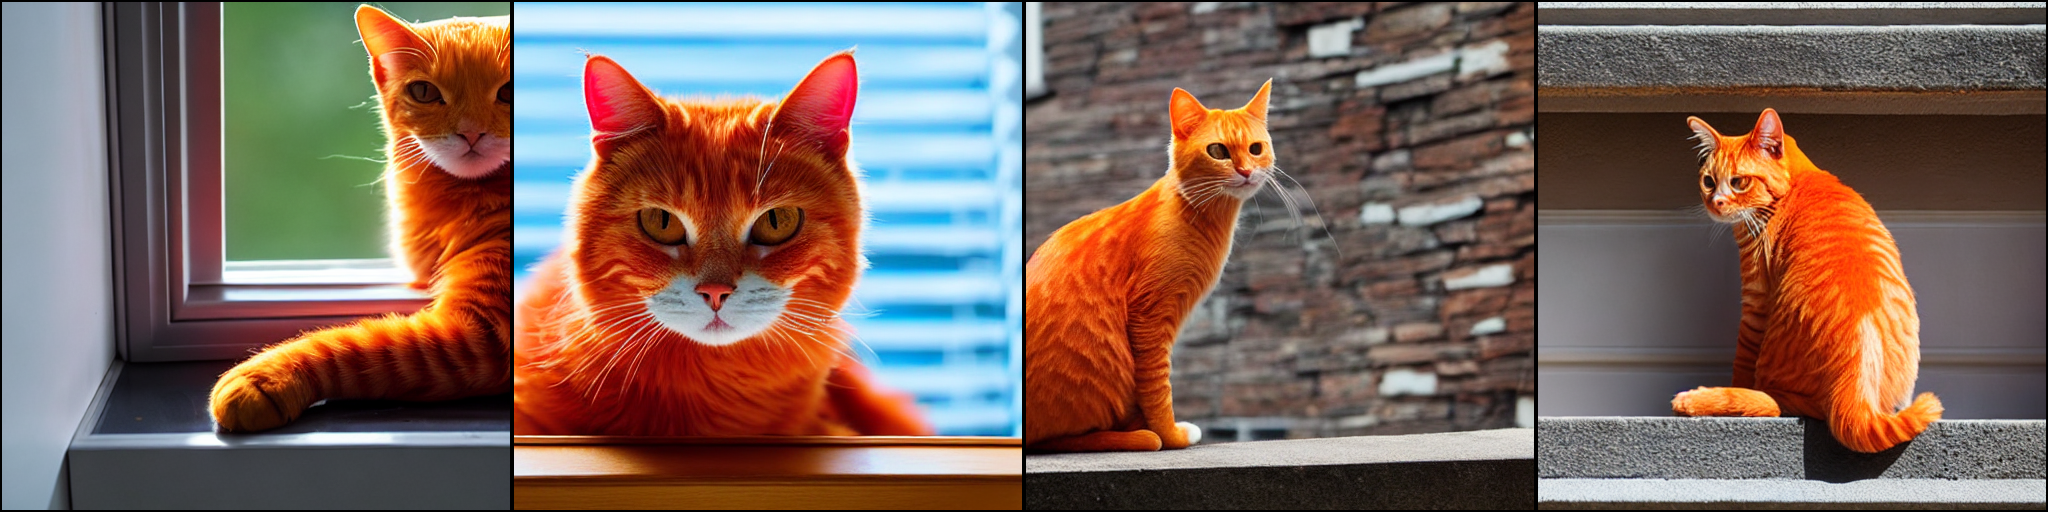

In [4]:
from diffusers import DiffusionPipeline
import torch
import PIL
from PIL import Image, ImageDraw

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
prompt = "An orange cat in a windowsill"
seed = 123456789

def make_grid(images, rows, cols, resize_to=256, border_width=2, border_color="black"):
    images = [image.resize((resize_to, resize_to)) for image in images]
    w, h = images[0].size
    grid = Image.new("RGB", size=(cols*w, rows*h), color="white")
    draw = ImageDraw.Draw(grid)

    for i, image in enumerate(images):
        x = (i%cols)*w
        y = (i//cols)*h
        grid.paste(image, box=(x, y))
        draw.rectangle(
            [x, y, x + w - 1, y + h - 1],
            outline=border_color,
            width=border_width
        )
    grid.save("cobagenerate.png")
    return grid

images = [pipeline(prompt=prompt, negative_prompt="blurry, low quality, distorted, grainy", generator=torch.Generator("cuda").manual_seed(seed + i)).images[0] for i in range(4)]

print(f"Generated {len(images)} images")
make_grid(images, rows=1, cols=4, resize_to=512)

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Original prompt: Kemacetan lalu lintas di Jakarta Pusat pada malam hari di bawah hujan deras, dengan aspal basah, lampu menyala, dan pantulan mobil.
Translated prompt: Traffic jams in Central Jakarta at night under heavy rain, with wet asphalt, lights on, and the reflection of the car.


  0%|          | 0/60 [00:00<?, ?it/s]

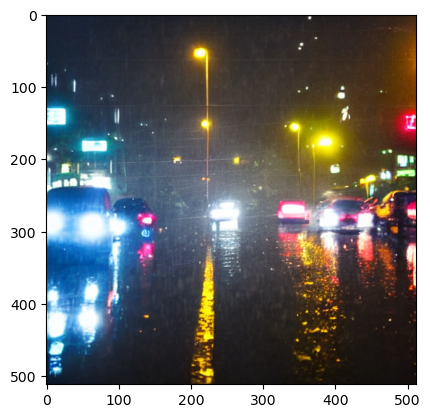

In [10]:
from diffusers import DiffusionPipeline
import torch
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
ori_prompt = "Kemacetan lalu lintas di Jakarta Pusat pada malam hari di bawah hujan deras, dengan aspal basah, lampu menyala, dan pantulan mobil."
trans_prompt = GoogleTranslator(source='auto', target='en').translate(ori_prompt)
print(f"Original prompt: {ori_prompt}")
print(f"Translated prompt: {trans_prompt}")
seed = 123456789

images = pipeline(
    prompt=trans_prompt,
    neg_prompt="blurry, low quality, distorted, deformed",
    generator=torch.Generator("cuda").manual_seed(seed),
    guidance_scale=9.0,
    num_inference_steps=60,
    num_images_per_prompt=1
).images

images[0].save("cobagenerate2.png")
plt.imshow(images[0])
plt.show()